<a href="https://colab.research.google.com/github/bilalProgTech/btech-nmims/blob/master/NN-DL/Lab-Work/20230813-Lab-4-BTech-NNDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def compute_grad(x):
    return 2 * x

# Momentum

In [3]:
lr = 0.5 # Learning rate
momentum = 0.9 # beta
momentum_term = 0 # Momentum Gradient

w = -5.0 # Intial W (weights)

w_values = [w] # Array of Weights
updated_gradient = [] # Array of updated gradient at each epochs
epochs = 100 # number of epochs

In [4]:
for step in range(epochs):
    gradient = compute_grad(w)
    momentum_term = momentum * momentum_term + (1 - momentum) * gradient
    w -= (lr * momentum_term)
    w_values.append(w)
    updated_gradient.append(momentum_term)

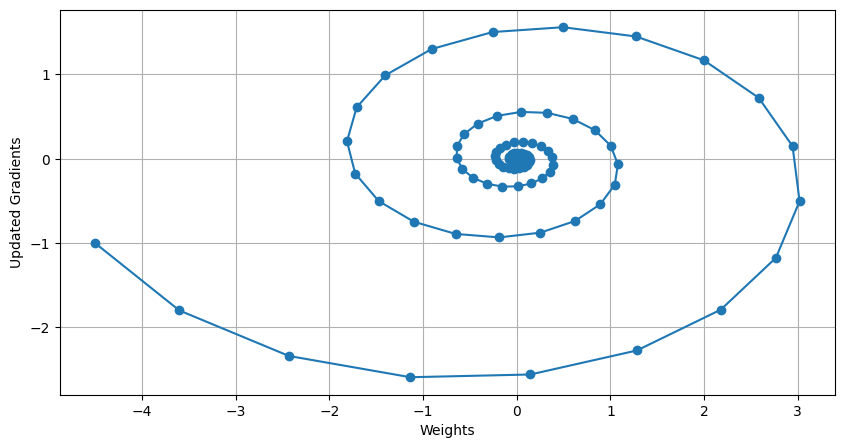

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(w_values[1:], updated_gradient, marker='o')
plt.xlabel('Weights')
plt.ylabel('Updated Gradients')
plt.grid(True)
plt.show()

# RMS Prop

In [25]:
lr = 0.1 # learning rate
decay_rate = 0.9 # beta
epsilon = 1e-8 # Episilon

sqaured_grad_acc = 0.0 # Initial squared gradients
w = -5.0 # Intial W (weights)

w_values = [w] # Array of Weights
updated_gradient = [] # Array of updated gradient at each epochs
epochs = 100 # number of epochs

In [26]:
for step in range(epochs):
    gradient = compute_grad(w)
    sqaured_grad_acc = decay_rate * sqaured_grad_acc + (1 - decay_rate) * gradient**2
    update = (lr/np.sqrt(sqaured_grad_acc+epsilon)) * gradient
    w -= update
    w_values.append(w)
    updated_gradient.append(update)

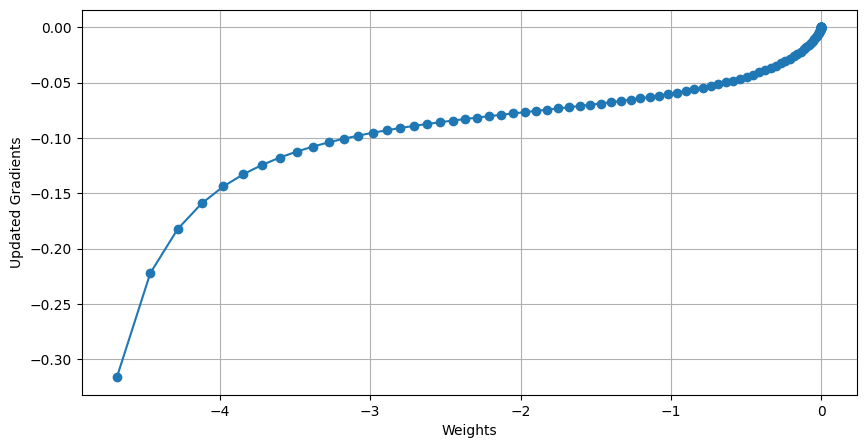

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(w_values[1:], updated_gradient, marker='o')
plt.xlabel('Weights')
plt.ylabel('Updated Gradients')
plt.grid(True)
plt.show()

# Adam

In [37]:
lr = 0.2 # learning rate
momentum = 0.9 # beta 1
momentum_term = 0 # Momentum Gradient

decay_rate = 0.999 # beta 2
epsilon = 1e-8 # Episilon

sqaured_grad_acc = 0.0 # Initial squared gradients
w = -5.0 # Intial W (weights)

w_values = [w] # Array of Weights
updated_gradient = [] # Array of updated gradient at each epochs
epochs = 100 # number of epochs

In [38]:
for step in range(epochs):
    gradient = compute_grad(w)
    sqaured_grad_acc = decay_rate * sqaured_grad_acc + (1 - decay_rate) * gradient**2
    momentum_term = momentum * momentum_term + (1 - momentum) * gradient
    update = (lr/np.sqrt(sqaured_grad_acc+epsilon)) * momentum_term
    w -= update
    w_values.append(w)
    updated_gradient.append(update)

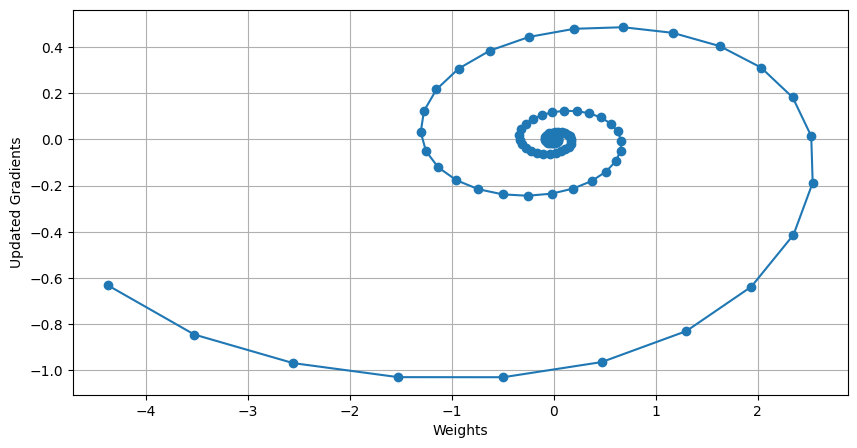

In [39]:
plt.figure(figsize=(10, 5))
plt.plot(w_values[1:], updated_gradient, marker='o')
plt.xlabel('Weights')
plt.ylabel('Updated Gradients')
plt.grid(True)
plt.show()

Upload kaggle.json

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess
!unzip *.zip

In [ ]:
import tensorflow as tf
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
import IPython.display as ipd

In [ ]:
files = []
class_series = []

In [ ]:
for dirname, _, filenames in os.walk('/content/TESS Toronto emotional speech set data'):
    for filename in filenames:
        filepath = os.path.join(dirname, filename)
        class_series.append(filepath.split('/')[-1].replace('.wav','').split('_'))
        files.append(filepath)
data = pd.DataFrame(class_series, columns=['actress', 'word', 'class'])
data['filename'] = files
data = data.sample(frac=1)
data = data.reset_index(drop=True)
data.head()

,actress,word,class,filename
0,OAF,luck,fear,/content/TESS Toronto emotional speech set dat...
1,OAF,book,ps,/content/TESS Toronto emotional speech set dat...
2,OAF,talk,disgust,/content/TESS Toronto emotional speech set dat...
3,OAF,cool,neutral,/content/TESS Toronto emotional speech set dat...
4,YAF,shout,ps,/content/TESS Toronto emotional speech set dat...


In [ ]:
data.shape

(2800, 4)

    ss = '/content/emotion_speech/YAF_neutral/YAF_germ_neutral.wav'
    ss.split('/')[-1].replace('.wav','').split('_')

In [ ]:
data['class'].value_counts()

fear       400
ps         400
disgust    400
neutral    400
happy      400
angry      400
sad        400
Name: class, dtype: int64

In [ ]:
def get_audio_feature_plots(path, class_, word, actress):
    x , sr = librosa.load(path)
    plt.figure(figsize=(20, 5))
    plt.title('Waveplot of '+class_+' '+actress+' for word '+word)
    librosa.display.waveshow(x, sr=sr)
    plt.show()

    plt.figure(figsize=(20, 6))
    plt.title('MFCC Spectral of '+class_+' '+actress+' for word '+word)
    mfccs = librosa.feature.mfcc(y=x, sr=sr) # n_mfcc
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    print(mfccs.shape)
    plt.show()

    plt.figure(figsize=(20, 6))
    plt.title('Mel Spectrogram of '+class_+' '+actress+' for word '+word)
    mel_spec = librosa.feature.melspectrogram(y=x, sr=sr)
    librosa.display.specshow(mel_spec, sr=sr, x_axis='time')
    plt.show()

In [ ]:
data.head()

,actress,word,class,filename
0,OAF,luck,fear,/content/TESS Toronto emotional speech set dat...
1,OAF,book,ps,/content/TESS Toronto emotional speech set dat...
2,OAF,talk,disgust,/content/TESS Toronto emotional speech set dat...
3,OAF,cool,neutral,/content/TESS Toronto emotional speech set dat...
4,YAF,shout,ps,/content/TESS Toronto emotional speech set dat...


In [ ]:
data['actress'].value_counts()

YAF    1400
OAF    1399
OA        1
Name: actress, dtype: int64

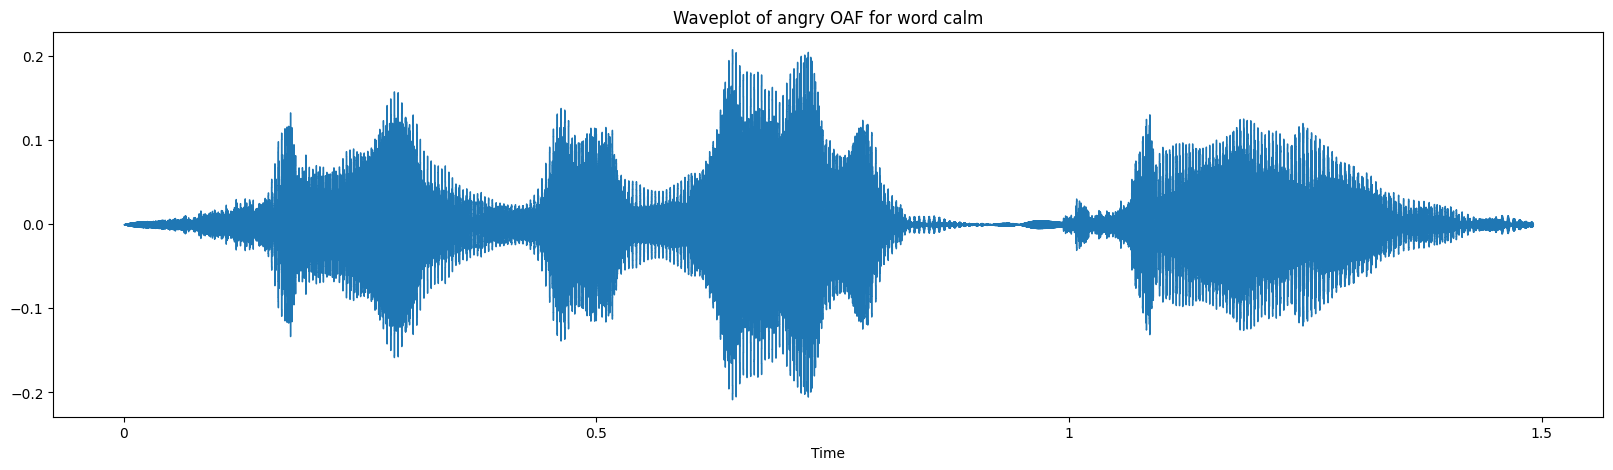

(20, 65)


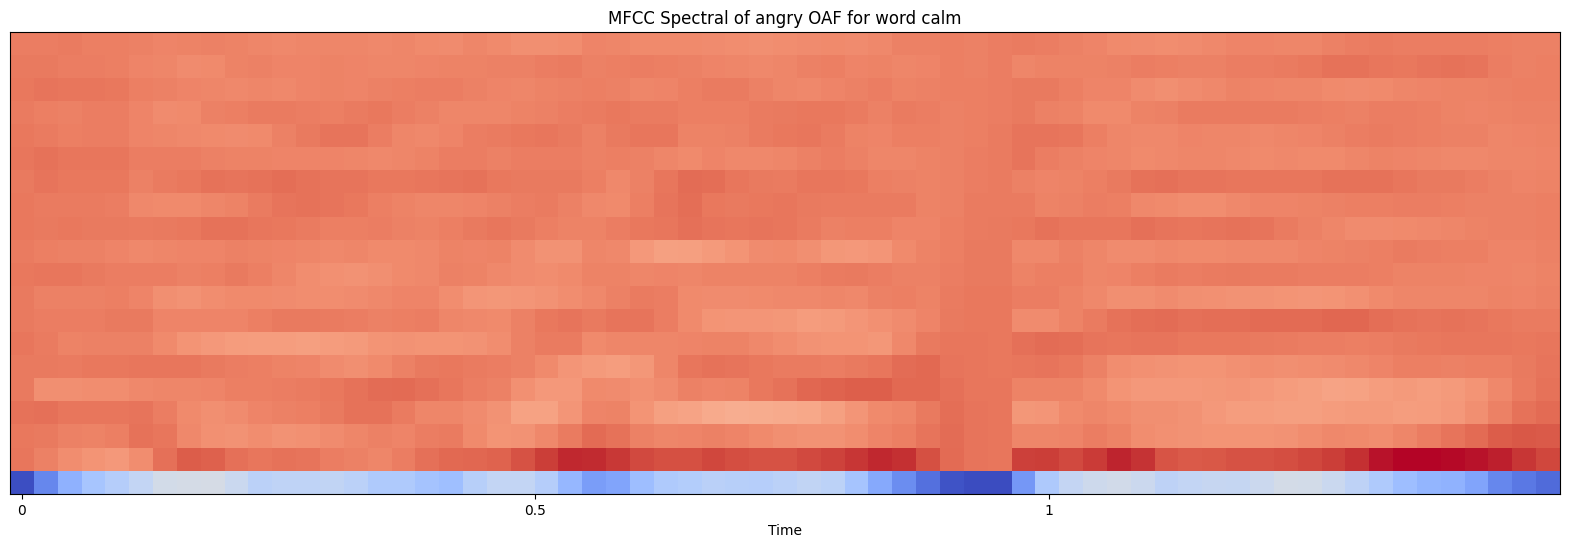

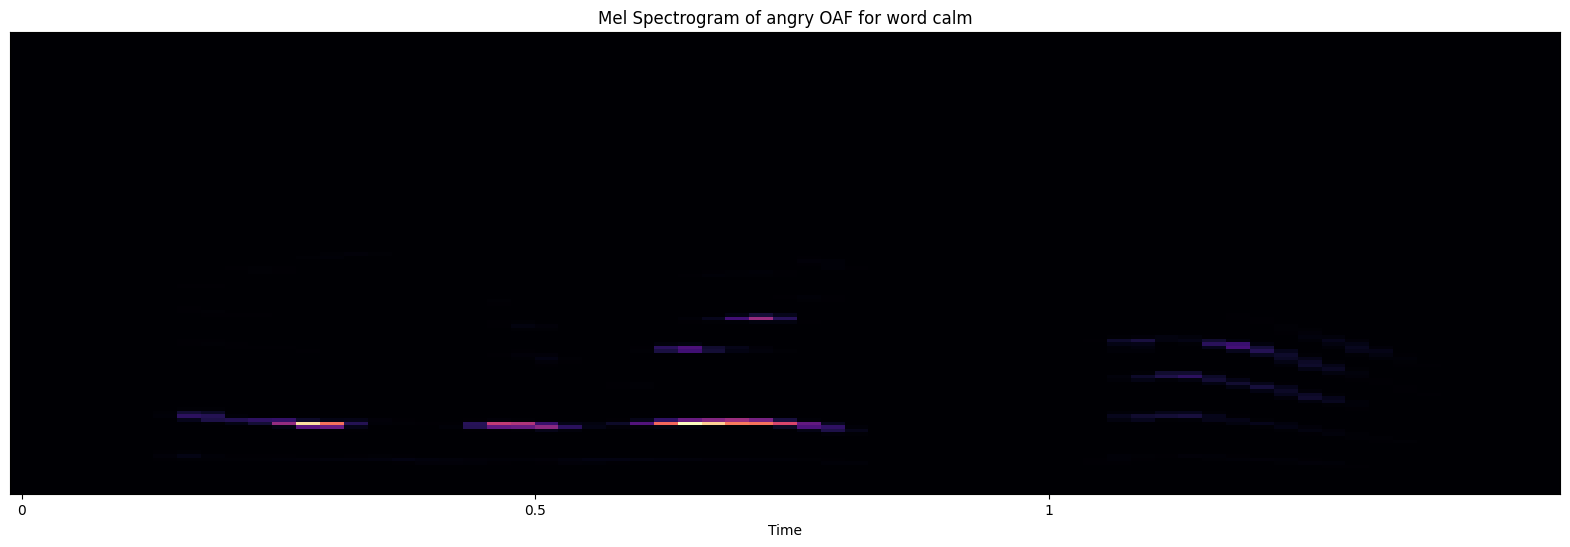

In [ ]:
sample = data[(data['class'] == 'angry') & (data['word'] == 'calm') & (data['actress'] == 'OAF')]
get_audio_feature_plots(sample['filename'].values[0], sample['class'].values[0], sample['word'].values[0], sample['actress'].values[0])
ipd.Audio(sample.filename.values[0])

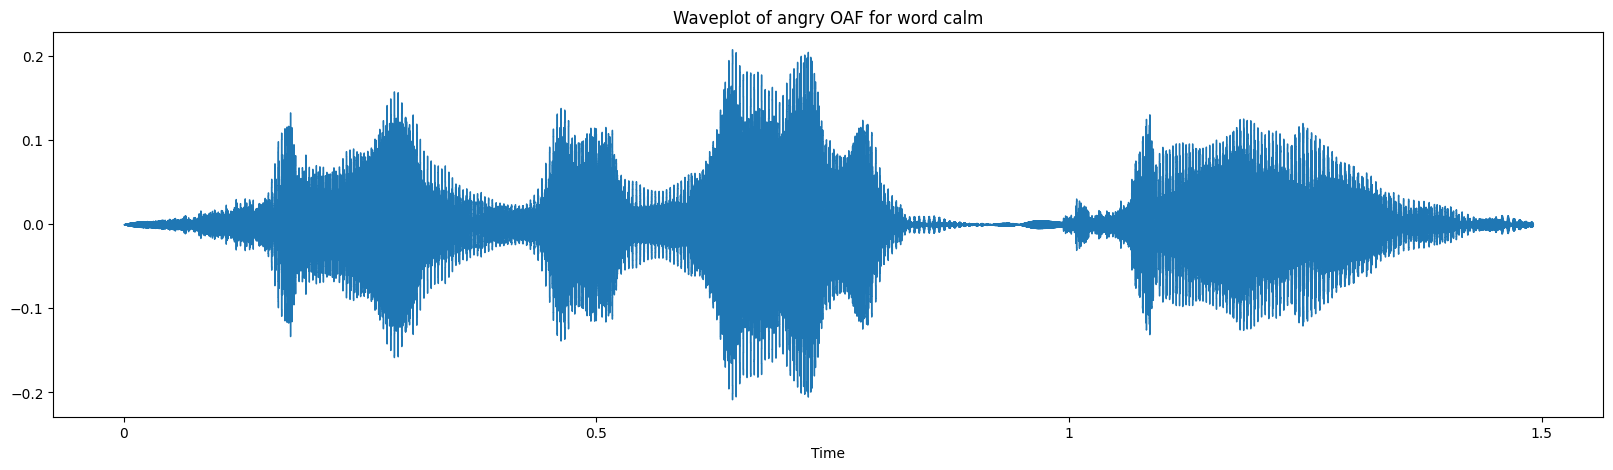

(20, 65)


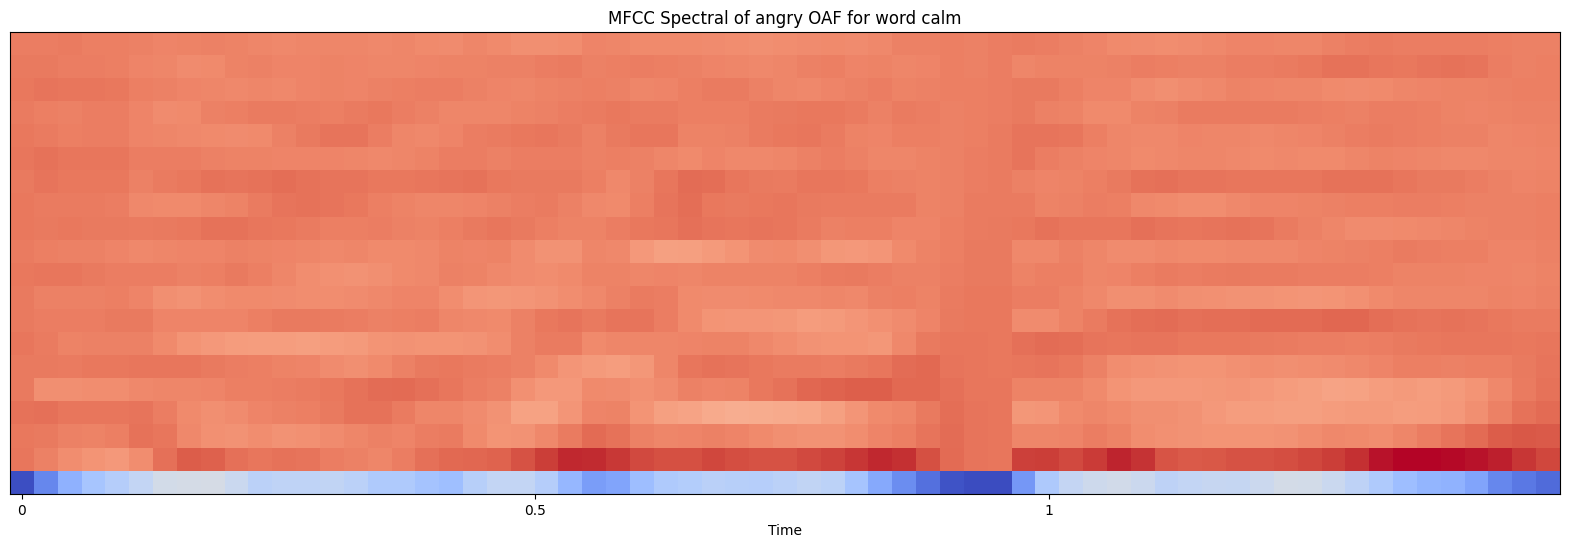

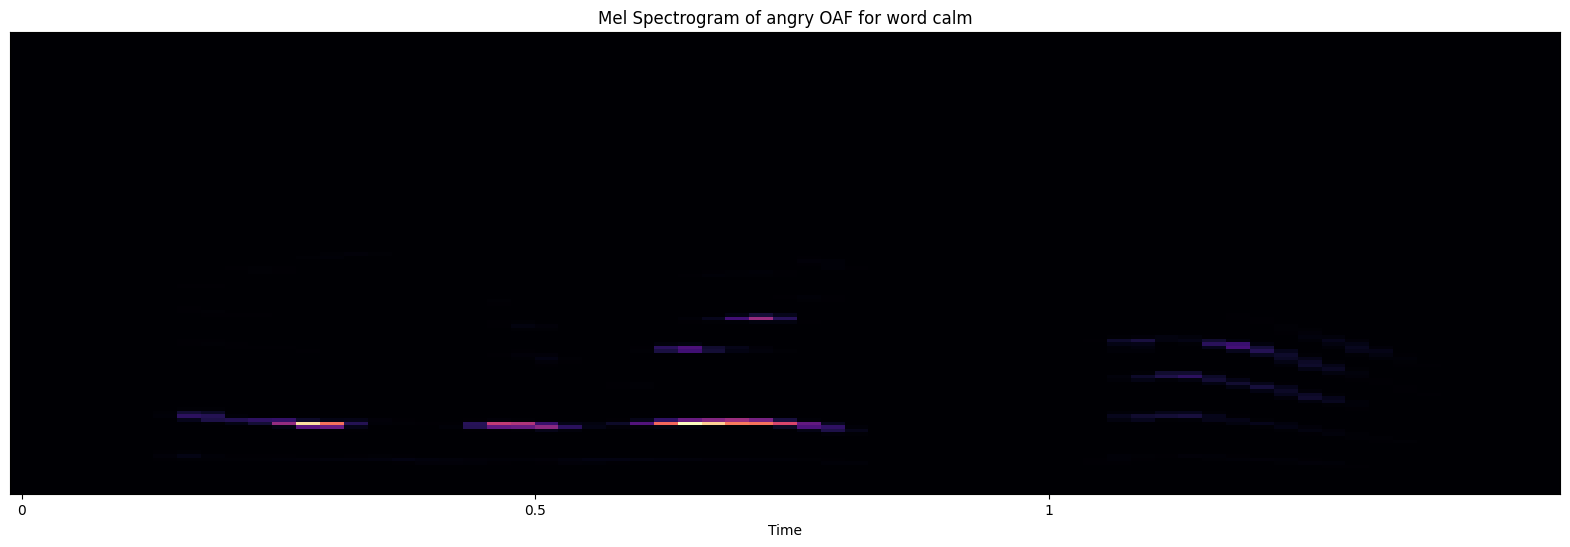

In [ ]:
psample = data[(data['class'] == 'angry') & (data['word'] == 'calm') & (data['actress'] == 'YAF')]
get_audio_feature_plots(sample['filename'].values[0], sample['class'].values[0], sample['word'].values[0], sample['actress'].values[0])
ipd.Audio(sample.filename.values[0])

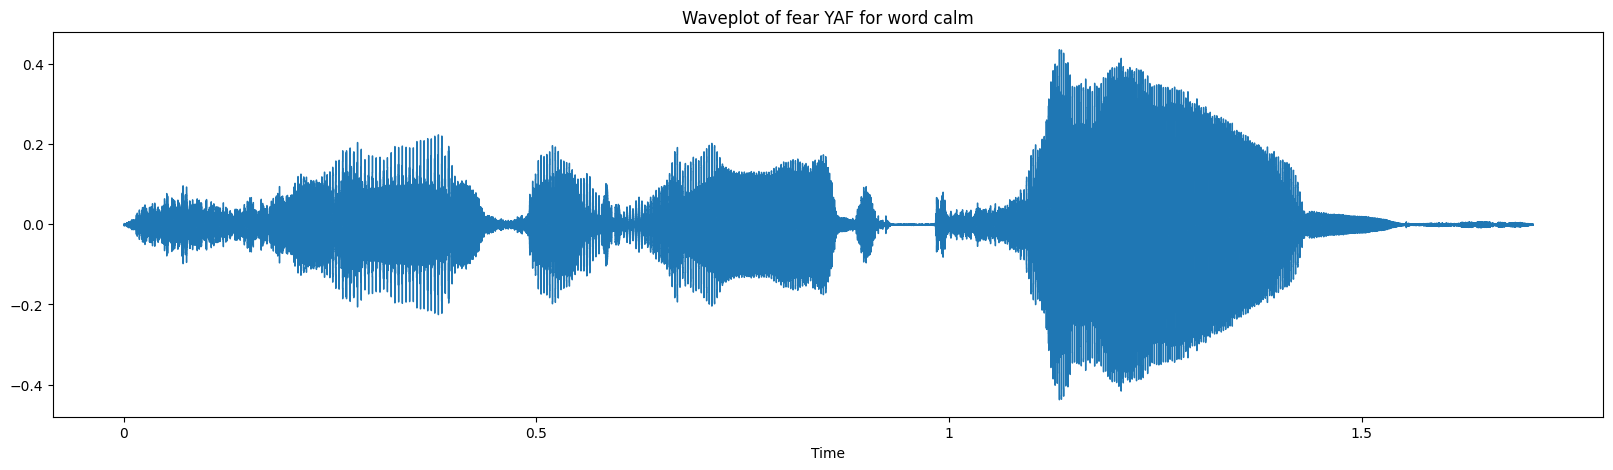

(20, 74)


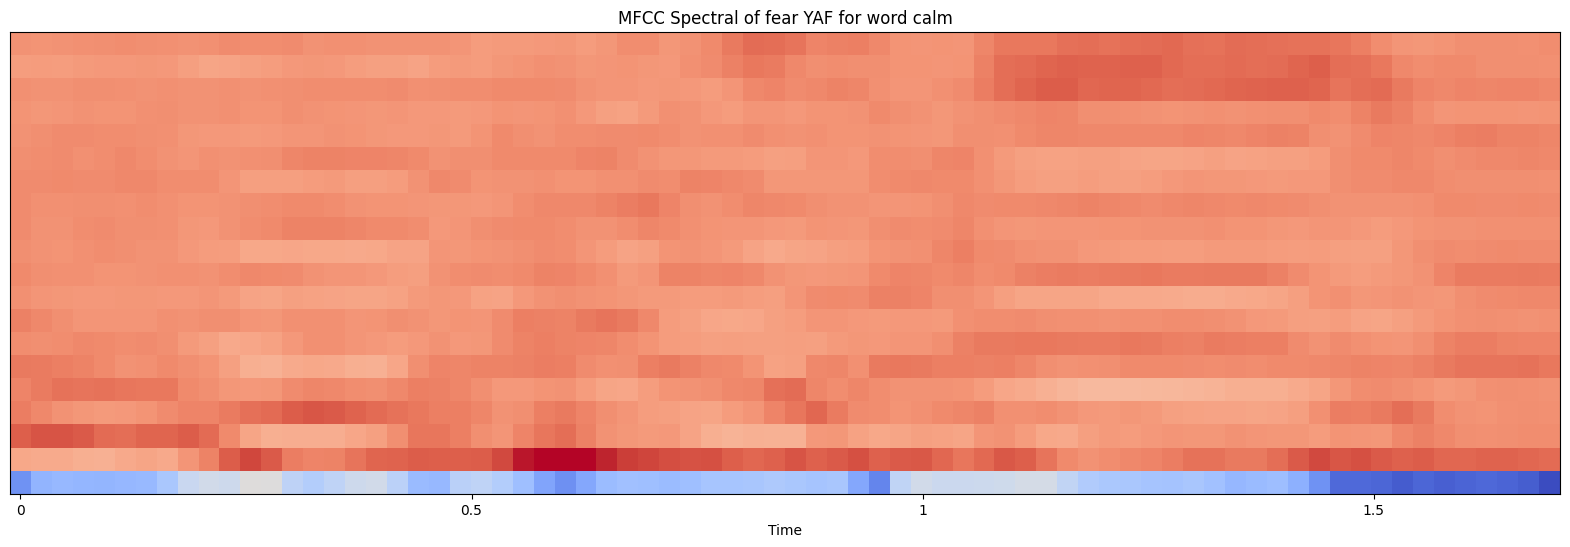

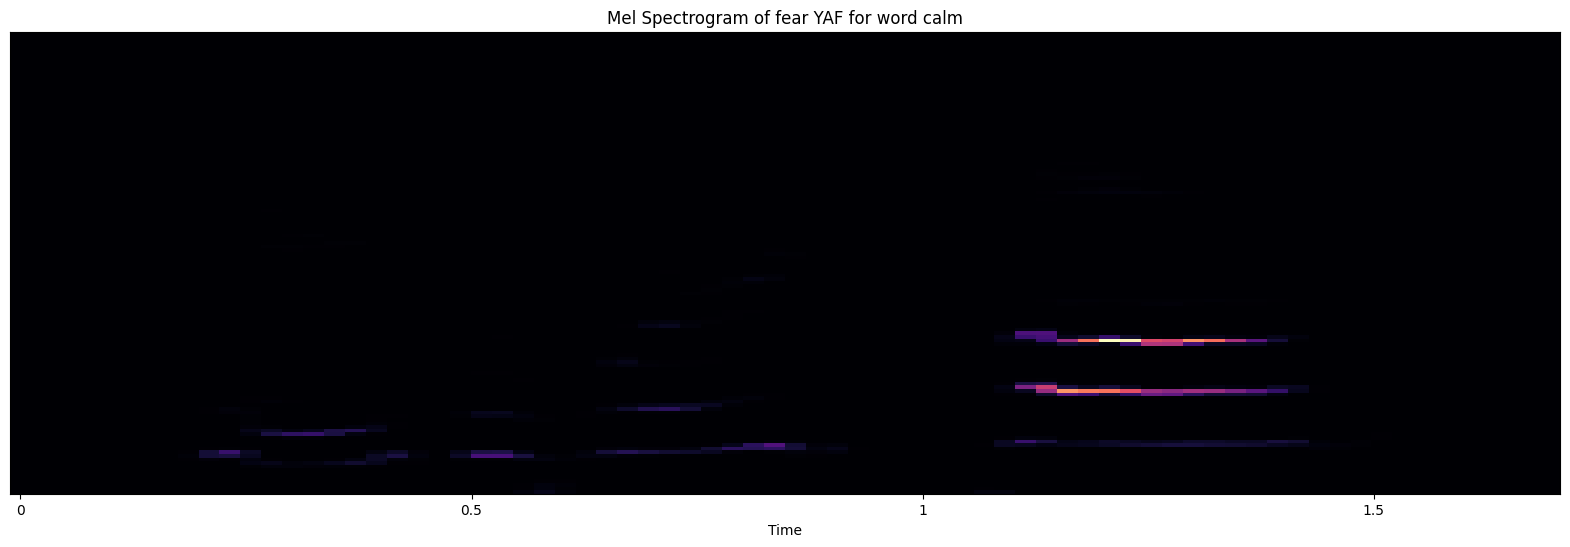

In [ ]:
sample = data[(data['class'] == 'fear') & (data['word'] == 'calm') & (data['actress'] == 'YAF')]
get_audio_feature_plots(sample['filename'].values[0], sample['class'].values[0], sample['word'].values[0], sample['actress'].values[0])
ipd.Audio(sample.filename.values[0])

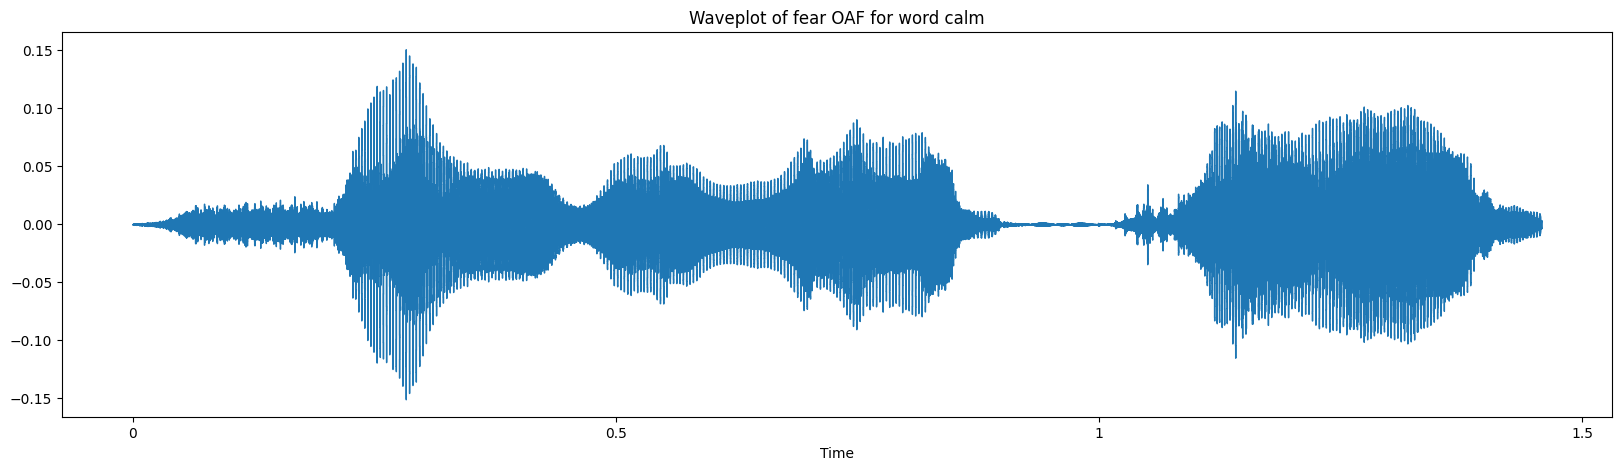

(20, 63)


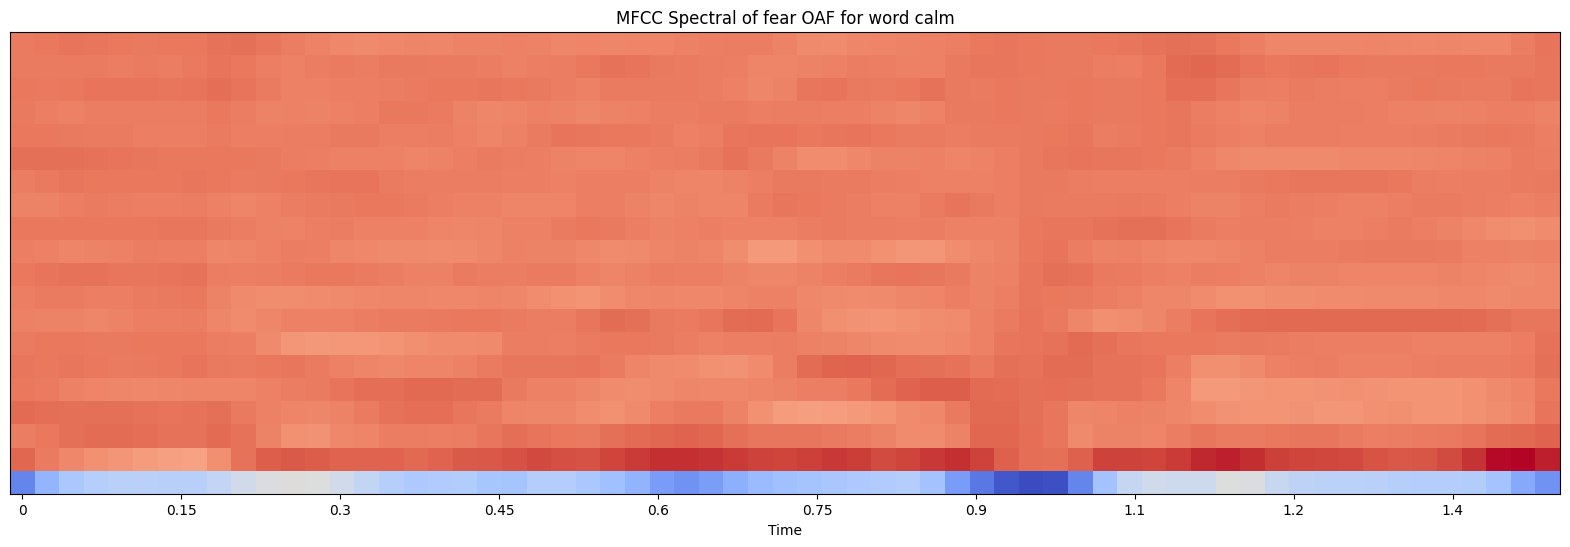

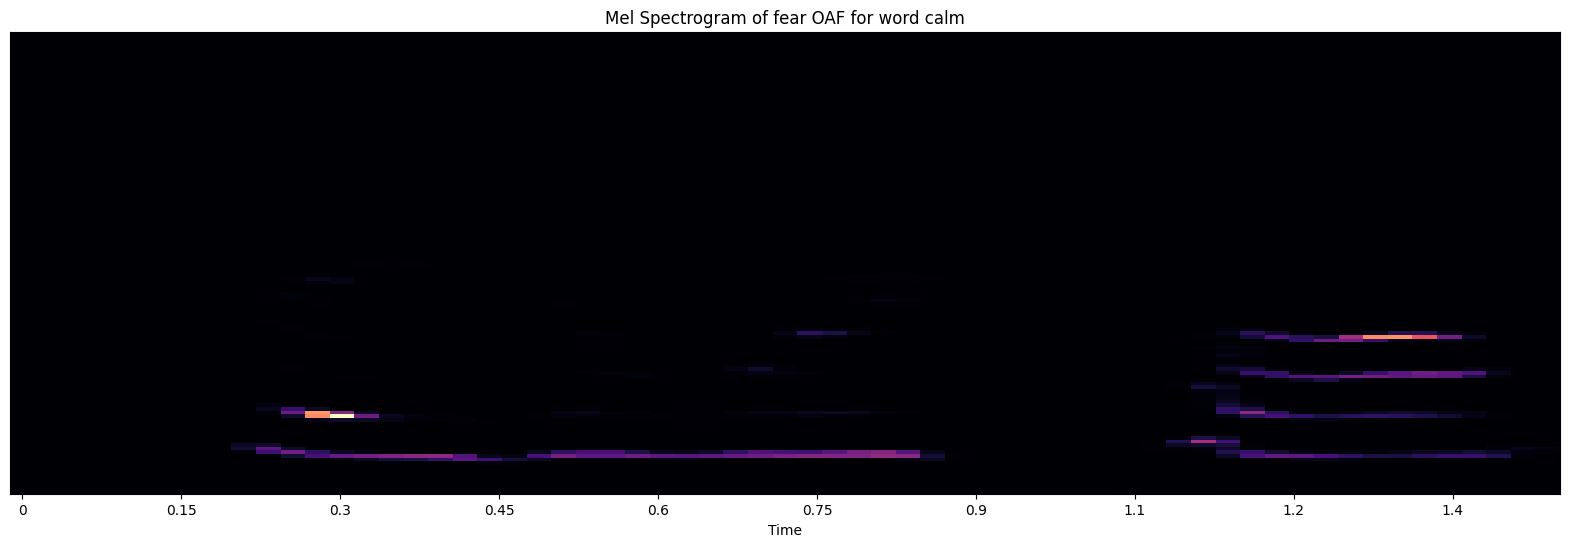

In [ ]:
sample = data[(data['class'] == 'fear') & (data['word'] == 'calm') & (data['actress'] == 'OAF')]
get_audio_feature_plots(sample['filename'].values[0], sample['class'].values[0], sample['word'].values[0], sample['actress'].values[0])
ipd.Audio(sample.filename.values[0])

# Modelling

## Feature Extraction

In [ ]:
def create_mfcc_features(path):
    mfccs = []
    try:
        x , sr = librosa.load(path)
        mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=128)
        mfccs = np.mean(mfccs.T,axis=0)
    except:
        print('Error reading audio')
    return mfccs

In [ ]:
def create_melspec_features(path):
    melspec = []
    try:
        x , sr = librosa.load(path)
        melspec = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128)
        melspec = np.mean(melspec.T,axis=0)
    except:
        print('Error reading audio')
    return melspec

In [ ]:
%%time
X_df = pd.DataFrame(data['filename'].apply(lambda x: create_mfcc_features(x)).tolist())
X_df.head()

CPU times: user 48.3 s, sys: 33.6 s, total: 1min 21s
Wall time: 57.8 s


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-432.039856,56.114468,14.664823,-8.593875,-4.928177,1.021667,-11.205730,-0.508698,-13.545884,-0.275360,...,0.051093,-0.277073,-0.279922,-1.095522,-0.249184,-0.427794,-0.634992,-0.395927,0.042351,0.114931
1,-437.324127,79.704491,16.824547,-8.055618,4.060332,-2.884561,-7.085702,0.967910,-14.897722,2.180626,...,-0.593445,0.060518,-0.332923,-0.440600,0.059465,-0.053305,0.184455,0.024296,0.036471,-0.598251
2,-427.842957,100.600311,14.069196,-9.735400,0.985745,1.760687,-6.337551,1.504340,-12.706650,5.193612,...,0.520162,-0.053808,0.092320,0.507758,0.265734,0.419786,0.041279,-0.100898,0.175625,-0.028306
3,-513.962891,77.956512,24.235783,2.378484,6.851607,5.537362,-0.112821,-4.878406,-12.993627,-3.509361,...,-1.184337,-0.090393,-1.814038,-0.533970,-0.671567,-1.037685,0.079998,-0.576963,-0.949261,0.187565
4,-328.649200,26.171640,-4.913253,3.207921,-16.890072,-4.990901,-12.927194,-8.232955,-12.003481,5.212716,...,0.404769,0.176826,-0.058301,-0.107050,-0.033439,0.190585,-0.093960,0.126223,-0.342291,0.024497


In [ ]:
X_df.shape

(2800, 128)

In [ ]:
encoder = LabelEncoder()
encoder.fit(data['class'])
y = encoder.transform(data['class'])

In [ ]:
data.shape

(2800, 4)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(np.array(X_df), y, test_size=0.10)

In [ ]:
x_train.shape, x_val.shape

((2520, 128), (280, 128))

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 16, 8, 1)
x_val = x_val.reshape(x_val.shape[0], 16, 8, 1)

## CNN Model

In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(16, 8, 1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(len(data['class'].unique()), activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 8, 16)         160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 4, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 4, 8)           1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 2, 8)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 16)                1

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=20)

Epoch 1/20
79/79 [==============================] - 2s 7ms/step - loss: 2.0677 - accuracy: 0.1940
Epoch 2/20
79/79 [==============================] - 0s 6ms/step - loss: 1.2652 - accuracy: 0.5595
Epoch 3/20
79/79 [==============================] - 1s 6ms/step - loss: 0.6075 - accuracy: 0.8091
Epoch 4/20
79/79 [==============================] - 0s 6ms/step - loss: 0.2928 - accuracy: 0.9179
Epoch 5/20
79/79 [==============================] - 1s 10ms/step - loss: 0.1692 - accuracy: 0.9532
Epoch 6/20
79/79 [==============================] - 1s 10ms/step - loss: 0.1138 - accuracy: 0.9718
Epoch 7/20
79/79 [==============================] - 1s 10ms/step - loss: 0.0869 - accuracy: 0.9798
Epoch 8/20
79/79 [==============================] - 1s 9ms/step - loss: 0.0775 - accuracy: 0.9774
Epoch 9/20
79/79 [==============================] - 1s 6ms/step - loss: 0.0583 - accuracy: 0.9841
Epoch 10/20
79/79 [==============================] - 0s 6ms/step - loss: 0.0493 - accuracy: 0.9869
Epoch 11/20
79/7

In [ ]:
model.evaluate(x_val, y_val)

9/9 [==============================] - 0s 4ms/step - loss: 0.0297 - accuracy: 0.9893


[0.02967359684407711, 0.9892857074737549]

In [ ]:
prob_val = model.predict(x_val)
pred_val = np.argmax(prob_val, axis=1)
pred_val = encoder.inverse_transform(pred_val)

9/9 [==============================] - 0s 3ms/step


In [ ]:
confusion_matrix(encoder.inverse_transform(y_val), pred_val)

array([[41,  0,  0,  1,  0,  0,  0],
       [ 0, 35,  0,  1,  0,  0,  0],
       [ 0,  0, 42,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0, 40,  0,  0],
       [ 0,  0,  0,  1,  0, 42,  0],
       [ 0,  0,  0,  0,  0,  0, 40]])